Missing states: ['California', 'Hawaii', 'Louisiana', 'North Dakota', 'New Jersey', 'Ohio']


C:\Users\nicar\AppData\Local\Temp\ipykernel_25616\2595197465.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", num_clusters)  # "tab10" is a good discrete colormap


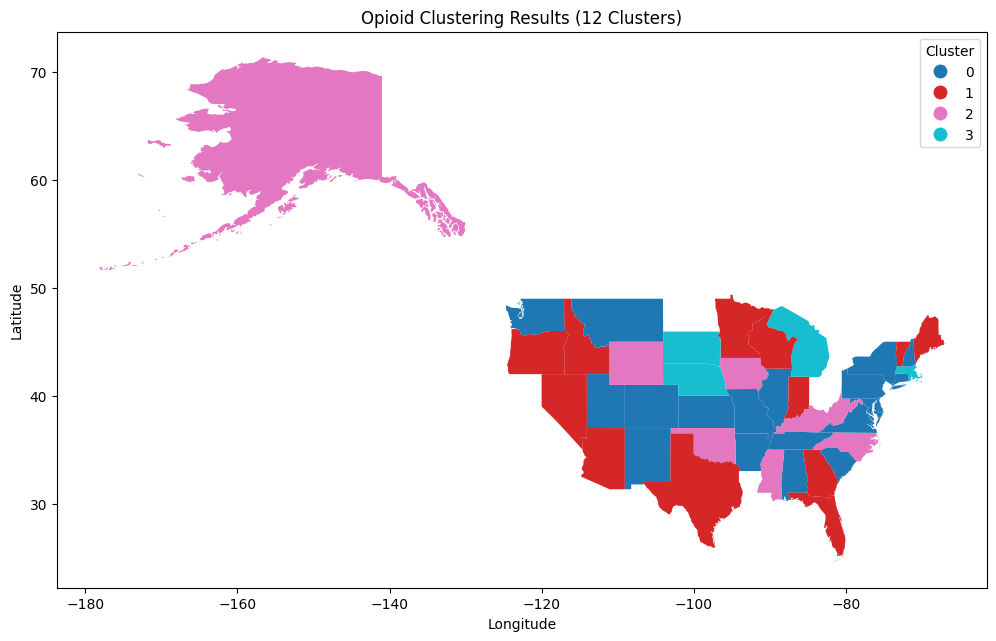

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load clustering results CSV
clusters_df = pd.read_csv("data/kmeans_cosine_clustering_results_4_1-1_threshold_0.25_n4.csv")

# Load U.S. shapefile
states_gdf = gpd.read_file("data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp")

# Filter only U.S. states
states_gdf = states_gdf[states_gdf['iso_a2'] == 'US'].copy()

# Rename shapefile column for merging
states_gdf.rename(columns={'name': 'State'}, inplace=True)

# Merge clustering data with shapefile
merged_gdf = states_gdf.merge(clusters_df, on='State', how='left')

# Check for missing states
missing_states = merged_gdf[merged_gdf["Cluster"].isnull()]
print("Missing states:", missing_states["State"].tolist())

# Define distinct colors for each cluster
num_clusters = merged_gdf["Cluster"].nunique()
cmap = plt.cm.get_cmap("tab10", num_clusters)  # "tab10" is a good discrete colormap
norm = mcolors.BoundaryNorm(range(num_clusters + 1), cmap.N)

# Plot the map with distinct colors
fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(column='Cluster', cmap=cmap, legend=True, norm=norm, ax=ax, categorical=True)

# Format the legend
legend = ax.get_legend()
if legend:
    legend.set_title("Cluster")
    for text, cluster in zip(legend.texts, range(num_clusters)):
        text.set_text(str(cluster))  # Convert labels to cluster numbers

# Finalize plot
plt.title("Opioid Clustering Results (12 Clusters)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


Missing states: ['California', 'Hawaii', 'Louisiana', 'North Dakota', 'New Jersey', 'Ohio']


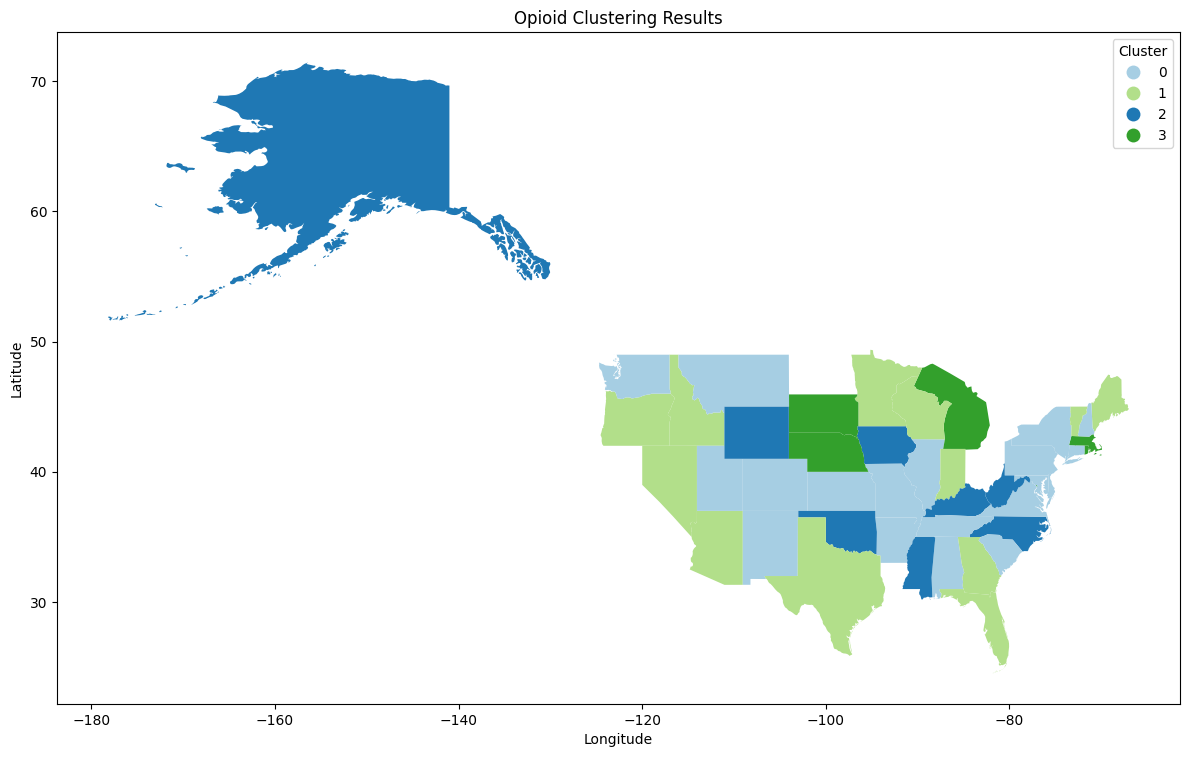

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm

# Load clustering results CSV
clusters_df = pd.read_csv("data/kmeans_cosine_clustering_results_4_1-1_threshold_0.25_n4.csv")

# Load U.S. shapefile
states_gdf = gpd.read_file("data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp")

# Filter only U.S. states
states_gdf = states_gdf[states_gdf['iso_a2'] == 'US'].copy()

# Rename shapefile column for merging
states_gdf.rename(columns={'name': 'State'}, inplace=True)

# Merge clustering data with shapefile
merged_gdf = states_gdf.merge(clusters_df, on='State', how='left')

# Check for missing states
missing_states = merged_gdf[merged_gdf["Cluster"].isnull()]
print("Missing states:", missing_states["State"].tolist())

# Number of clusters
num_clusters = merged_gdf["Cluster"].nunique()

##############################################################################
# 1. Define a specific color for each cluster.
#    Example: 12 clusters => 12 color hex codes.
#    You can replace these with colors of your choice.
##############################################################################
custom_colors = [
    "#a6cee3",  # Cluster 0
    "#b2df8a",  # Cluster 1
    "#1f78b4",  # Cluster 2
    "#33a02c",  # Cluster 3|
]

# Create a discrete ListedColormap from your custom color list
# (If you have more or fewer clusters, adjust accordingly.)
cmap = ListedColormap(custom_colors[:num_clusters])

# We use BoundaryNorm to ensure each integer cluster ID maps to the right color
# e.g., 0 -> custom_colors[0], 1 -> custom_colors[1], etc.
norm = BoundaryNorm(range(num_clusters + 1), cmap.N)

##############################################################################
# 2. Plot using our custom colormap and norm.
##############################################################################
fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(
    column='Cluster',
    cmap=cmap,
    norm=norm,
    legend=True,
    ax=ax,
    categorical=True
)

# Format the legend
legend = ax.get_legend()
if legend:
    legend.set_title("Cluster")
    for text_obj, cluster_id in zip(legend.texts, range(num_clusters)):
        text_obj.set_text(str(cluster_id))  # label them 0..(num_clusters-1)

plt.title("Opioid Clustering Results")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


Excluded (missing cluster): ['California', 'Hawaii', 'Louisiana', 'North Dakota', 'New Jersey', 'Ohio']


C:\Users\nicar\AppData\Local\Temp\ipykernel_25616\3784384707.py:92: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()


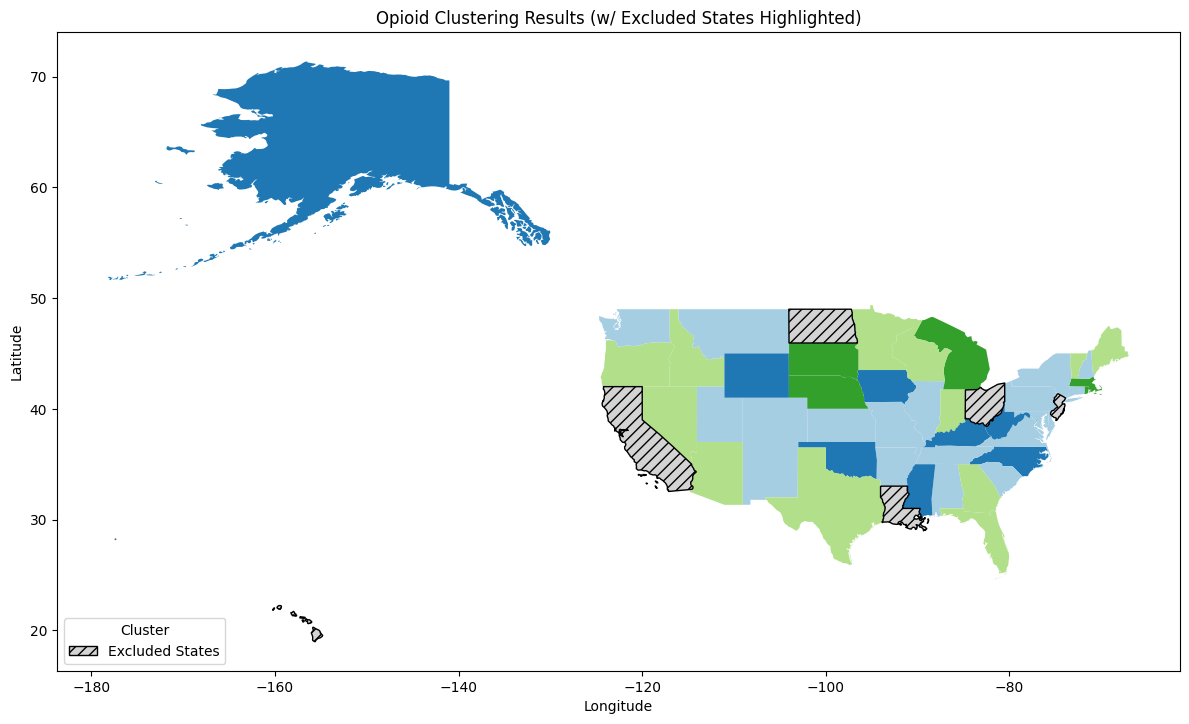

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

# Load clustering results CSV
clusters_df = pd.read_csv("data/kmeans_cosine_clustering_results_4_1-1_threshold_0.25_n4.csv")

# Load U.S. shapefile
states_gdf = gpd.read_file("data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp")

# Filter only U.S. states
states_gdf = states_gdf[states_gdf['iso_a2'] == 'US'].copy()

# Rename shapefile column for merging
states_gdf.rename(columns={'name': 'State'}, inplace=True)

# Merge clustering data with shapefile
merged_gdf = states_gdf.merge(clusters_df, on='State', how='left')

##############################################################################
# 1. Split into included vs. excluded subsets
##############################################################################
included_gdf = merged_gdf[merged_gdf["Cluster"].notnull()].copy()
excluded_gdf = merged_gdf[merged_gdf["Cluster"].isnull()].copy()

# Basic info
print("Excluded (missing cluster):", excluded_gdf["State"].tolist())

##############################################################################
# 2. Prepare a custom colormap for your clusters (same as before).
##############################################################################
num_clusters = included_gdf["Cluster"].nunique()

# Example colors for up to 12 clusters
custom_colors = [
    "#a6cee3",  # Cluster 0
    "#b2df8a",  # Cluster 1
    "#1f78b4",  # Cluster 2
    "#33a02c",  # Cluster 3|
]

# Listed colormap & norm
cmap = ListedColormap(custom_colors[:num_clusters])
norm = BoundaryNorm(range(num_clusters + 1), cmap.N)

##############################################################################
# 3. Plot the included states using your usual cluster color mapping.
#    Then overlay the excluded states in gray with a striped hatch pattern.
##############################################################################
fig, ax = plt.subplots(figsize=(12, 8))

# --- Plot included states with the cluster color map ---
plot_included = included_gdf.plot(
    column='Cluster',
    cmap=cmap,
    norm=norm,
    legend=True,
    ax=ax,
    categorical=True
)

# Format the legend that was automatically created
legend = ax.get_legend()
if legend:
    legend.set_title("Cluster")
    for text_obj, cluster_id in zip(legend.texts, range(num_clusters)):
        text_obj.set_text(str(cluster_id))  # label them 0..(num_clusters-1)

# --- Overlay the excluded states in gray with hatch pattern ---
excluded_gdf.plot(
    ax=ax,
    color="lightgray",   # fill color
    edgecolor="black",   # outline
    hatch="///",         # hatch pattern (or "\\", "*", "o", etc.)
    label="Excluded States"  # label for the legend
)

##############################################################################
# 4. Create a custom legend entry for the excluded states.
##############################################################################
# If you want a single combined legend, you can add a custom patch for excluded states:
excluded_patch = mpatches.Patch(
    facecolor="lightgray", 
    hatch="///", 
    edgecolor="black", 
    label="Excluded States"
)

handles, labels = ax.get_legend_handles_labels()
handles.append(excluded_patch)
labels.append("Excluded States")
ax.legend(handles, labels, title="Cluster", loc="lower left")  # or "upper right", etc.

##############################################################################
# 5. Final formatting
##############################################################################
plt.title("Opioid Clustering Results (w/ Excluded States Highlighted)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()


Excluded (missing cluster): ['California', 'Hawaii', 'Louisiana', 'North Dakota', 'New Jersey', 'Ohio']


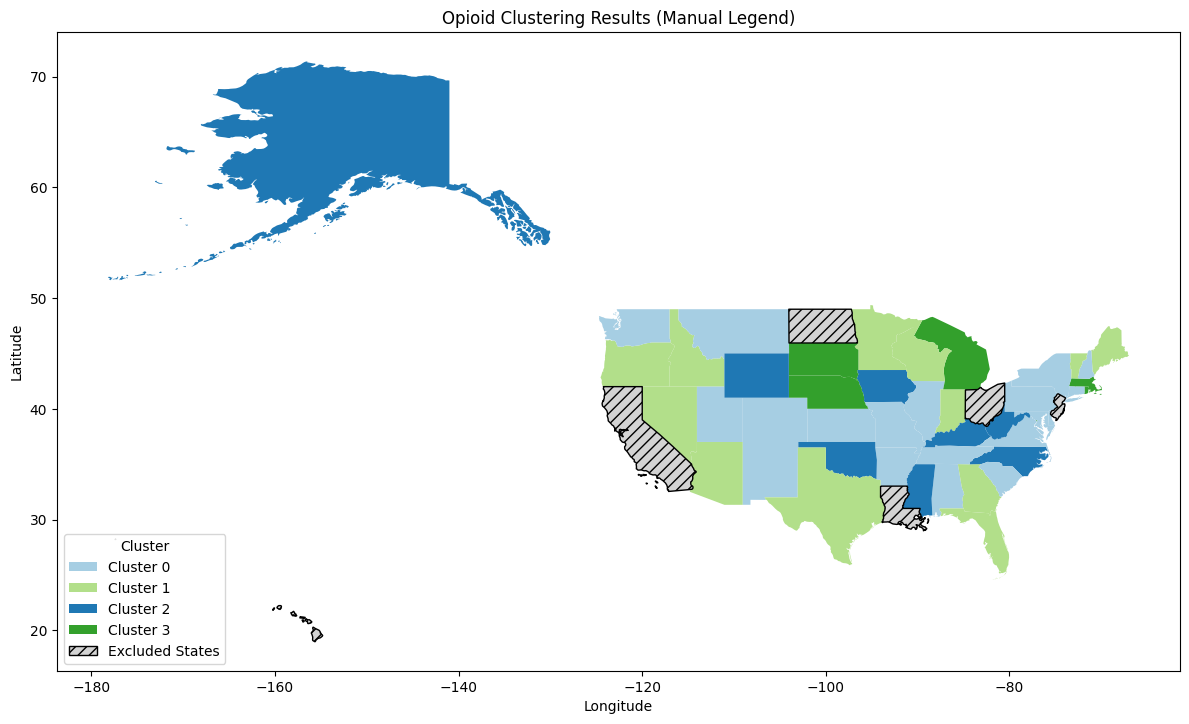

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, BoundaryNorm

# 1) Read and merge data
clusters_df = pd.read_csv("data/kmeans_cosine_clustering_results_4_1-1_threshold_0.25_n4.csv")
states_gdf = gpd.read_file("data/ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp")
states_gdf = states_gdf[states_gdf['iso_a2'] == 'US'].copy()
states_gdf.rename(columns={'name': 'State'}, inplace=True)
merged_gdf = states_gdf.merge(clusters_df, on='State', how='left')

# 2) Split into included vs. excluded
included_gdf = merged_gdf[merged_gdf["Cluster"].notnull()].copy()
excluded_gdf = merged_gdf[merged_gdf["Cluster"].isnull()].copy()

num_clusters = included_gdf["Cluster"].nunique()
print("Excluded (missing cluster):", excluded_gdf["State"].tolist())

# 3) Define your cluster colors (one per cluster index)
custom_colors = [
    "#a6cee3",  # Cluster 0
    "#b2df8a",  # Cluster 1
    "#1f78b4",  # Cluster 2
    "#33a02c",  # Cluster 3
]
cmap = ListedColormap(custom_colors[:num_clusters])
norm = BoundaryNorm(range(num_clusters + 1), cmap.N)

fig, ax = plt.subplots(figsize=(12, 8))

# 4) Plot included states with no auto legend
included_gdf.plot(
    column="Cluster",
    cmap=cmap,
    norm=norm,
    ax=ax,
    categorical=True,
    legend=False  # <-- Turn off auto legend
)

# Plot excluded states in gray/hatch
excluded_gdf.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    hatch="///",
)

# 5) Build a custom legend manually
handles = []
labels = []

# Suppose you have a list/array of cluster IDs that might look like [0.0, 1.0, 2.0, ...]
unique_clusters = sorted(included_gdf["Cluster"].unique())

for cid in unique_clusters:
    # Convert float -> int so 0.0 becomes 0
    # (or use a format string if you want one decimal place, like f"{cid:.1f}")
    cluster_id_str = str(int(cid))  

    patch = mpatches.Patch(
        facecolor=custom_colors[int(cid)],
        label=f"Cluster {cluster_id_str}"
    )
    handles.append(patch)
    labels.append(f"Cluster {cluster_id_str}")


# Add a patch for excluded states
excluded_patch = mpatches.Patch(
    facecolor="lightgray",
    hatch="///",
    edgecolor="black",
    label="Excluded States"
)
handles.append(excluded_patch)
labels.append("Excluded States")

ax.legend(handles, labels, title="Cluster", loc="lower left")

# 6) Final formatting
ax.set_title("Opioid Clustering Results (Manual Legend)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

